In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
dfg = pd.read_csv('wat-r11-good.csv')
dfm = pd.read_csv('wat-r11-mals.csv')

In [6]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,924,0,3,0xe76c0,0,0,3,2,8,0,0,27,11,900,9,32,37,1,1,1
1,932,4,0,0xe76c0,1,0,3,2,8,27,11,29,13,928,9,31,37,1,1,1
2,995,0,1,0xe76c0,2,0,3,2,8,29,13,27,11,976,9,7,37,1,1,1
3,2246,0,3,0x532c0,0,0,3,2,8,0,0,27,11,2222,22,5,20,1,1,1
4,2254,4,0,0x532c0,1,0,3,2,9,27,11,29,13,2250,22,4,20,1,1,1


In [7]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,799,1,3,0x1af7c0,0,0,3,2,8,1,1,31,15,779,16,1,49,1,1,0
1,923,0,3,0xe76c0,0,0,3,2,8,0,0,27,11,899,18,47,55,1,1,0
2,931,4,0,0xe76c0,1,0,3,2,8,27,11,29,13,927,18,44,55,1,1,0
3,996,0,1,0xe76c0,2,0,3,2,8,29,13,27,11,976,18,5,55,1,1,0
4,1484,0,3,0x1242c0,0,0,3,2,8,1,1,27,11,1464,30,3,67,1,1,0


In [8]:
df = dfg.append(dfm, ignore_index=True)

In [9]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,924,0,3,0xe76c0,0,0,3,2,8,0,0,27,11,900,9,32,37,1,1,1
1,932,4,0,0xe76c0,1,0,3,2,8,27,11,29,13,928,9,31,37,1,1,1
2,995,0,1,0xe76c0,2,0,3,2,8,29,13,27,11,976,9,7,37,1,1,1
3,2246,0,3,0x532c0,0,0,3,2,8,0,0,27,11,2222,22,5,20,1,1,1
4,2254,4,0,0x532c0,1,0,3,2,9,27,11,29,13,2250,22,4,20,1,1,1


In [10]:
df = df.sort_values('time')

In [11]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
6430,799,1,3,0x1af7c0,0,0,3,2,8,1,1,31,15,779,16,1,49,1,1,0
6431,923,0,3,0xe76c0,0,0,3,2,8,0,0,27,11,899,18,47,55,1,1,0
0,924,0,3,0xe76c0,0,0,3,2,8,0,0,27,11,900,9,32,37,1,1,1
6432,931,4,0,0xe76c0,1,0,3,2,8,27,11,29,13,927,18,44,55,1,1,0
1,932,4,0,0xe76c0,1,0,3,2,8,27,11,29,13,928,9,31,37,1,1,1
2,995,0,1,0xe76c0,2,0,3,2,8,29,13,27,11,976,9,7,37,1,1,1
6433,996,0,1,0xe76c0,2,0,3,2,8,29,13,27,11,976,18,5,55,1,1,0
6434,1484,0,3,0x1242c0,0,0,3,2,8,1,1,27,11,1464,30,3,67,1,1,0
6435,1492,4,0,0x1242c0,1,0,3,2,9,27,11,29,13,1488,30,2,67,1,1,0
6436,1552,0,1,0x1242c0,2,0,3,2,8,29,13,27,11,1536,30,21,71,1,1,0


In [12]:
df.to_csv('wat-r11-pkt.csv',index=False)

In [13]:
df = pd.read_csv("wat-r11-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,799,1,3,0x1af7c0,0,0,3,2,8,1,1,31,15,779,16,1,49,1,1,0
1,923,0,3,0xe76c0,0,0,3,2,8,0,0,27,11,899,18,47,55,1,1,0
2,924,0,3,0xe76c0,0,0,3,2,8,0,0,27,11,900,9,32,37,1,1,1
3,931,4,0,0xe76c0,1,0,3,2,8,27,11,29,13,927,18,44,55,1,1,0
4,932,4,0,0xe76c0,1,0,3,2,8,27,11,29,13,928,9,31,37,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12533,3251442,4,0,0x1152c0,5,3,1,2,11,27,11,29,13,3251417,10026,22,42,1,1,1
12534,3251449,4,0,0x1152c0,5,4,2,2,11,27,11,29,13,3251417,10026,18,42,1,1,1
12535,3251450,4,0,0x4d2c0,1,0,3,2,8,27,11,29,13,3251418,10027,16,42,1,1,1
12536,3251452,4,0,0x1152c0,6,0,3,2,9,27,11,0,0,3251448,10026,15,42,1,1,1


In [14]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,0.024850,-0.036003,0.053956,0.018995,-0.027940,NaN,0.024920,0.030702,0.027209,-0.029841,-0.042371,1.000000,0.982245,-0.031551,-0.020363,NaN,NaN,0.096011
outport,0.024850,1.000000,-0.905012,0.390031,-0.015378,0.021917,NaN,0.650316,0.823977,0.799434,-0.224972,-0.125354,0.024858,0.025831,0.094801,0.195224,NaN,NaN,0.001995
inport,-0.036003,-0.905012,1.000000,-0.316991,0.104961,-0.151991,NaN,-0.621658,-0.983219,-0.973723,0.297860,0.278743,-0.036012,-0.037090,-0.065801,-0.179863,NaN,NaN,-0.000790
packet_type,0.053956,0.390031,-0.316991,1.000000,0.405395,-0.588846,NaN,0.064991,0.259375,0.243196,-0.298429,-0.249960,0.053963,0.057230,0.126293,0.053985,NaN,NaN,0.009257
flit_id,0.018995,-0.015378,0.104961,0.405395,1.000000,-0.116117,NaN,-0.122308,-0.143478,-0.152537,0.233847,0.227837,0.018989,0.020424,-0.030248,0.055758,NaN,NaN,0.004952
flit_type,-0.027940,0.021917,-0.151991,-0.588846,-0.116117,1.000000,NaN,0.177778,0.207945,0.221107,-0.339596,-0.330869,-0.027944,-0.030143,-0.149960,0.073071,NaN,NaN,-0.006873
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.024920,0.650316,-0.621658,0.064991,-0.122308,0.177778,NaN,1.000000,0.567053,0.550360,-0.192036,-0.161135,0.024924,0.026236,0.044668,0.150061,NaN,NaN,0.000795
src_ni,0.030702,0.823977,-0.983219,0.259375,-0.143478,0.207945,NaN,0.567053,1.000000,0.998885,-0.288177,-0.283575,0.030712,0.031538,0.039230,0.162658,NaN,NaN,-0.001069
src_router,0.027209,0.799434,-0.973723,0.243196,-0.152537,0.221107,NaN,0.550360,0.998885,1.000000,-0.284057,-0.282957,0.027219,0.028006,0.033586,0.159781,NaN,NaN,-0.002821


In [15]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [16]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,1,3,0,0,3,2,8,31,15,779,16,1,1
1,0,3,0,0,3,2,8,27,11,899,18,1,1
2,0,3,0,0,3,2,8,27,11,900,9,1,1
3,4,0,1,0,3,2,8,29,13,927,18,1,1
4,4,0,1,0,3,2,8,29,13,928,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12533,4,0,5,3,1,2,11,29,13,3251417,10026,1,1
12534,4,0,5,4,2,2,11,29,13,3251417,10026,1,1
12535,4,0,1,0,3,2,8,29,13,3251418,10027,1,1
12536,4,0,6,0,3,2,9,0,0,3251448,10026,1,1


In [17]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.25,1.000000,0.000000,0.00,1.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000680,0.0,0.0
1,0.00,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.870968,0.733333,0.000037,0.000875,0.0,0.0
2,0.00,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.870968,0.733333,0.000037,0.000000,0.0,0.0
3,1.00,0.000000,0.166667,0.00,1.000000,0.0,0.000000,0.935484,0.866667,0.000046,0.000875,0.0,0.0
4,1.00,0.000000,0.166667,0.00,1.000000,0.0,0.000000,0.935484,0.866667,0.000046,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12533,1.00,0.000000,0.833333,0.75,0.333333,0.0,1.000000,0.935484,0.866667,0.999976,0.973375,0.0,0.0
12534,1.00,0.000000,0.833333,1.00,0.666667,0.0,1.000000,0.935484,0.866667,0.999976,0.973375,0.0,0.0
12535,1.00,0.000000,0.166667,0.00,1.000000,0.0,0.000000,0.935484,0.866667,0.999977,0.973472,0.0,0.0
12536,1.00,0.000000,1.000000,0.00,1.000000,0.0,0.333333,0.000000,0.000000,0.999986,0.973375,0.0,0.0


In [18]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.905012,0.390031,-0.015378,0.021917,NaN,0.650316,-0.224972,-0.125354,0.024858,0.025831,NaN,NaN,0.001995
1,-0.905012,1.000000,-0.316991,0.104961,-0.151991,NaN,-0.621658,0.297860,0.278743,-0.036012,-0.037090,NaN,NaN,-0.000790
2,0.390031,-0.316991,1.000000,0.405395,-0.588846,NaN,0.064991,-0.298429,-0.249960,0.053963,0.057230,NaN,NaN,0.009257
3,-0.015378,0.104961,0.405395,1.000000,-0.116117,NaN,-0.122308,0.233847,0.227837,0.018989,0.020424,NaN,NaN,0.004952
4,0.021917,-0.151991,-0.588846,-0.116117,1.000000,NaN,0.177778,-0.339596,-0.330869,-0.027944,-0.030143,NaN,NaN,-0.006873
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.650316,-0.621658,0.064991,-0.122308,0.177778,NaN,1.000000,-0.192036,-0.161135,0.024924,0.026236,NaN,NaN,0.000795
7,-0.224972,0.297860,-0.298429,0.233847,-0.339596,NaN,-0.192036,1.000000,0.963203,-0.029846,-0.030983,NaN,NaN,-0.001527
8,-0.125354,0.278743,-0.249960,0.227837,-0.330869,NaN,-0.161135,0.963203,1.000000,-0.042376,-0.043906,NaN,NaN,-0.001402
9,0.024858,-0.036012,0.053963,0.018989,-0.027944,NaN,0.024924,-0.029846,-0.042376,1.000000,0.982245,NaN,NaN,0.096011


In [19]:
train_Y = df['target']

In [20]:
train_Y

0        0
1        0
2        1
3        0
4        1
        ..
12533    1
12534    1
12535    1
12536    1
12537    1
Name: target, Length: 12538, dtype: int64

In [21]:
pca = PCA(0.95)

In [22]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
principal_components = pca.transform(train_X)
principal_components

array([[-0.53143503,  1.07702455,  0.04060874, -0.10124216, -0.3048133 ,
         0.1906886 ],
       [-0.64418107,  1.12505107,  0.12837357, -0.12311507, -0.02995568,
         0.09733087],
       [-0.64420432,  1.12547438,  0.1280028 , -0.12310843, -0.02992932,
         0.09732435],
       ...,
       [ 0.70173401, -0.01933692,  0.822587  , -0.09295724, -0.30019875,
         0.64037824],
       [ 1.12228213, -0.1087497 ,  0.80581344, -0.06751322,  1.05637837,
         0.01955335],
       [-0.08918957, -0.00608385,  0.92665753, -0.10428776,  0.04511272,
         0.33109094]])

In [24]:
pca.explained_variance_ratio_

array([0.40569869, 0.18014758, 0.16806893, 0.1025344 , 0.08014243,
       0.04364969])

In [25]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

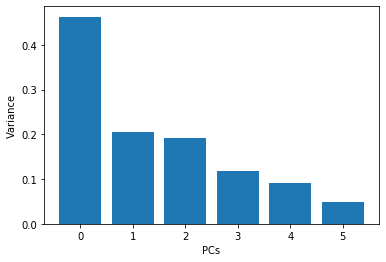

In [26]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [27]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5
0,-0.531435,1.077025,0.040609,-0.101242,-0.304813,0.190689
1,-0.644181,1.125051,0.128374,-0.123115,-0.029956,0.097331
2,-0.644204,1.125474,0.128003,-0.123108,-0.029929,0.097324
3,0.645079,1.023699,-0.093675,-0.076002,-0.233013,0.621216
4,0.645056,1.024122,-0.094046,-0.075995,-0.232987,0.621209
...,...,...,...,...,...,...
12533,1.058357,-0.711259,0.039050,-0.170088,-0.294258,-0.433157
12534,1.067006,-0.684180,0.061200,-0.574022,-0.281819,-0.403431
12535,0.701734,-0.019337,0.822587,-0.092957,-0.300199,0.640378
12536,1.122282,-0.108750,0.805813,-0.067513,1.056378,0.019553


In [28]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,target
0,-0.531435,1.077025,0.040609,-0.101242,-0.304813,0.190689,0
1,-0.644181,1.125051,0.128374,-0.123115,-0.029956,0.097331,0
2,-0.644204,1.125474,0.128003,-0.123108,-0.029929,0.097324,1
3,0.645079,1.023699,-0.093675,-0.076002,-0.233013,0.621216,0
4,0.645056,1.024122,-0.094046,-0.075995,-0.232987,0.621209,1
...,...,...,...,...,...,...,...
12533,1.058357,-0.711259,0.039050,-0.170088,-0.294258,-0.433157,1
12534,1.067006,-0.684180,0.061200,-0.574022,-0.281819,-0.403431,1
12535,0.701734,-0.019337,0.822587,-0.092957,-0.300199,0.640378,1
12536,1.122282,-0.108750,0.805813,-0.067513,1.056378,0.019553,1


In [29]:
final_df.corr()

,0,1,2,3,4,5,target
0,1.000000e+00,1.058727e-15,1.638305e-15,-1.480195e-15,-3.488537e-16,-6.640504e-15,0.002845
1,1.058727e-15,1.000000e+00,4.035553e-16,1.690581e-15,2.598803e-16,-2.449206e-16,-0.042464
2,1.638305e-15,4.035553e-16,1.000000e+00,1.270220e-15,1.554087e-15,-2.867917e-16,0.027588
3,-1.480195e-15,1.690581e-15,1.270220e-15,1.000000e+00,-3.641916e-15,1.183167e-15,0.000649
4,-3.488537e-16,2.598803e-16,1.554087e-15,-3.641916e-15,1.000000e+00,1.880602e-15,0.000221
5,-6.640504e-15,-2.449206e-16,-2.867917e-16,1.183167e-15,1.880602e-15,1.000000e+00,-0.001520
target,2.845116e-03,-4.246354e-02,2.758776e-02,6.490746e-04,2.214233e-04,-1.519907e-03,1.000000


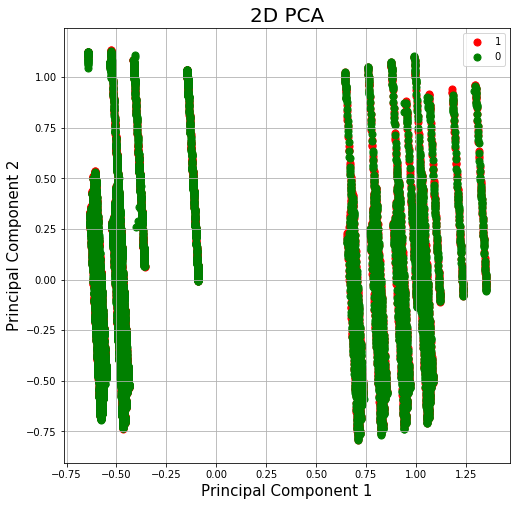

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,1,3,0,0,3,2,8,1,1,31,15,779,16,1,49,1,1,0
1,0,3,0,0,3,2,8,0,0,27,11,899,18,47,55,1,1,0
2,0,3,0,0,3,2,8,0,0,27,11,900,9,32,37,1,1,1
3,4,0,1,0,3,2,8,27,11,29,13,927,18,44,55,1,1,0
4,4,0,1,0,3,2,8,27,11,29,13,928,9,31,37,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12533,4,0,5,3,1,2,11,27,11,29,13,3251417,10026,22,42,1,1,1
12534,4,0,5,4,2,2,11,27,11,29,13,3251417,10026,18,42,1,1,1
12535,4,0,1,0,3,2,8,27,11,29,13,3251418,10027,16,42,1,1,1
12536,4,0,6,0,3,2,9,27,11,0,0,3251448,10026,15,42,1,1,1


In [32]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [33]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [34]:
seed = 7
np.random.seed(seed)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [36]:
model = Sequential()

In [37]:
n_cols = train_X.shape[1]
n_cols

13

In [38]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [40]:
model.fit(x_train, y_train, epochs=150, validation_split=0.4)

Train on 5115 samples, validate on 3410 samples
Epoch 1/150
5115/5115 [==============================] - 1s 265us/step - loss: 0.2500 - accuracy: 0.4970 - val_loss: 0.2499 - val_accuracy: 0.5170
Epoch 2/150
5115/5115 [==============================] - 0s 96us/step - loss: 0.2500 - accuracy: 0.5030 - val_loss: 0.2499 - val_accuracy: 0.5123
Epoch 3/150
5115/5115 [==============================] - 0s 92us/step - loss: 0.2499 - accuracy: 0.5038 - val_loss: 0.2499 - val_accuracy: 0.5106
Epoch 4/150
5115/5115 [==============================] - 0s 93us/step - loss: 0.2499 - accuracy: 0.5052 - val_loss: 0.2499 - val_accuracy: 0.5114
Epoch 5/150
5115/5115 [==============================] - 0s 96us/step - loss: 0.2499 - accuracy: 0.5073 - val_loss: 0.2499 - val_accuracy: 0.5132
Epoch 6/150
5115/5115 [==============================] - 0s 94us/step - loss: 0.2499 - accuracy: 0.5077 - val_loss: 0.2499 - val_accuracy: 0.5123
Epoch 7/150
5115/5115 [==============================] - 0s 97us/step - los

In [41]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [42]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 57.36%


In [48]:
dff = pd.read_csv('wat-r11-pkt.csv',nrows=500)

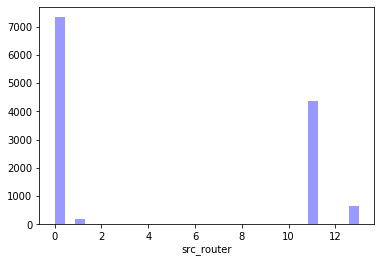

In [49]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

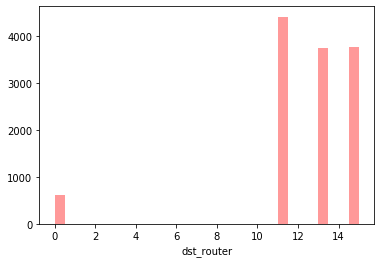

In [50]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

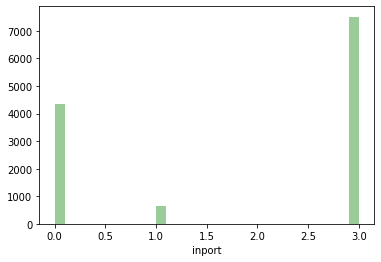

In [51]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

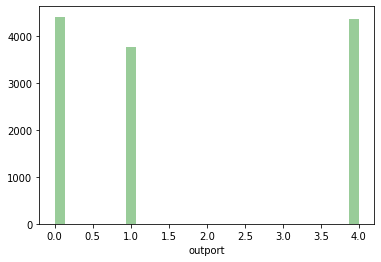

In [52]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

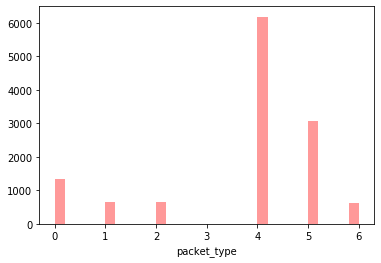

In [53]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')